In [1]:
import os
import glob

def set_directory() -> None:
    if glob.glob("*.ipynb"):
        os.chdir('..')
        print(" => Directory Changed")

    print(f"Current Directory: {os.getcwd()}")

set_directory()

 => Directory Changed
Current Directory: c:\Users\treynolds\Python_Projects\enrollment-classification


In [2]:
import pandas as pd

path = "./data/data.csv"
data = pd.read_csv(path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              41188 non-null  int64  
 1   occupation                41188 non-null  object 
 2   marital_status            41188 non-null  object 
 3   education_level           41188 non-null  object 
 4   credit_in_default         41188 non-null  object 
 5   housing_loan              41188 non-null  object 
 6   personal_loan             41188 non-null  object 
 7   contact_channel           41188 non-null  object 
 8   month                     41188 non-null  object 
 9   day_of_week               41188 non-null  object 
 10  number_contacts           41188 non-null  int64  
 11  number_days_since_last    41188 non-null  int64  
 12  number_contacts_previous  41188 non-null  int64  
 13  enroll_previous           41188 non-null  object 
 14  cpi   

,customer_age,occupation,marital_status,education_level,credit_in_default,housing_loan,personal_loan,contact_channel,month,day_of_week,number_contacts,number_days_since_last,number_contacts_previous,enroll_previous,cpi,cci,enroll
0,56,homemaker,married,basic,no,no,no,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no
1,57,services,married,high_school,unknown,no,no,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no
2,37,services,married,high_school,no,yes,no,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no
3,40,admin,married,basic,no,no,no,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no
4,56,services,married,high_school,no,no,yes,phone,may,M,1,999,0,does_not_exist,93.994,-36.4,no


In [3]:
from src.load import reduce_mem_usage

data = reduce_mem_usage(data)
print(data['enroll'].value_counts())
data.info()

Memory usage of dataframe is 5.34 MB
Memory usage after optimization is: 0.79 MB
Decreased by 85.3%

enroll
no     36548
yes     4640
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_age              41188 non-null  int8    
 1   occupation                41188 non-null  category
 2   marital_status            41188 non-null  category
 3   education_level           41188 non-null  category
 4   credit_in_default         41188 non-null  category
 5   housing_loan              41188 non-null  category
 6   personal_loan             41188 non-null  category
 7   contact_channel           41188 non-null  category
 8   month                     41188 non-null  category
 9   day_of_week               41188 non-null  category
 10  number_contacts           41188 non-null  int8    
 11

In [4]:
from src.explore import describe_categorical_features

describe_categorical_features(data)

0. occupation
 => admin (25.3%), blue_collar (22.47%), technician (16.37%), services (9.64%), management (7.1%), retired (4.18%), entrepreneur (3.54%), self_employed (3.45%), homemaker (2.57%), unemployed (2.46%), student (2.12%), unknown (0.8%)
1. marital_status
 => married (60.52%), single (28.09%), divorced (11.2%), unknown (0.19%)
2. education_level
 => basic (30.38%), college_degree (29.54%), high_school (23.1%), professional_training (12.73%), unknown (4.2%), illiterate (0.04%)
3. credit_in_default
 => no (79.12%), unknown (20.87%), yes (0.01%)
4. housing_loan
 => yes (52.38%), no (45.21%), unknown (2.4%)
5. personal_loan
 => no (82.43%), yes (15.17%), unknown (2.4%)
6. contact_channel
 => email (63.47%), phone (36.53%)
7. month
 => may (33.43%), jul (17.42%), aug (15.0%), jun (12.91%), nov (9.96%), apr (6.39%), oct (1.74%), sep (1.38%), mar (1.33%), dec (0.44%)
8. day_of_week
 => R (20.94%), M (20.67%), W (19.75%), T (19.64%), F (19.0%)
9. enroll_previous
 => does_not_exist (86.

There are too many subcategories to under sample, so oversampling the minority class might be effective

In [5]:
from src.load import upsample_data

data_upsampled = upsample_data(data, 'enroll', 42)
data_upsampled.head()


Beginning Upsampling:
 => Intial distribution:
enroll
no     36548
yes     4640
Name: count, dtype: int64
 => SMOTENC method implemented
 => Upsampled distribution:
enroll
no     36548
yes    36548
Name: count, dtype: int64
 => Upsampling complete


c:\Users\treynolds\Python_Projects\enrollment-classification\.venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,customer_age,occupation,marital_status,education_level,credit_in_default,housing_loan,personal_loan,contact_channel,month,day_of_week,number_contacts,number_days_since_last,number_contacts_previous,enroll_previous,cpi,cci,enroll
0,56,homemaker,married,basic,no,no,no,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no
1,57,services,married,high_school,unknown,no,no,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no
2,37,services,married,high_school,no,yes,no,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no
3,40,admin,married,basic,no,no,no,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no
4,56,services,married,high_school,no,no,yes,phone,may,M,1,999,0,does_not_exist,94.0,-36.40625,no


In [6]:
describe_categorical_features(data_upsampled)

0. occupation
 => admin (31.01%), blue_collar (19.46%), technician (15.76%), services (7.58%), retired (7.31%), management (6.13%), student (3.77%), self_employed (2.46%), entrepreneur (2.33%), unemployed (1.9%), homemaker (1.82%), unknown (0.47%)
1. marital_status
 => married (60.8%), single (30.56%), divorced (8.53%), unknown (0.11%)
2. education_level
 => college_degree (34.34%), basic (28.56%), high_school (22.48%), professional_training (11.37%), unknown (3.22%), illiterate (0.02%)
3. credit_in_default
 => no (85.95%), unknown (14.05%), yes (0.0%)
4. housing_loan
 => yes (54.53%), no (43.95%), unknown (1.52%)
5. personal_loan
 => no (87.61%), yes (10.91%), unknown (1.48%)
6. contact_channel
 => email (74.22%), phone (25.78%)
7. month
 => may (27.33%), jul (15.91%), aug (15.76%), jun (12.93%), nov (9.04%), apr (8.61%), oct (3.77%), mar (3.01%), sep (2.87%), dec (0.75%)
8. day_of_week
 => R (22.14%), W (20.61%), T (19.78%), M (19.32%), F (18.16%)
9. enroll_previous
 => does_not_exis

In [7]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'occupation', 'enroll')

TypeError: explore_single_plot() got an unexpected keyword argument 'cols'

We can see that occupations such as admin, retired, student are more likely to enroll. Whereas occupations such as blue collar, enrepeneur, home maker, self-employed are less likely to enroll.

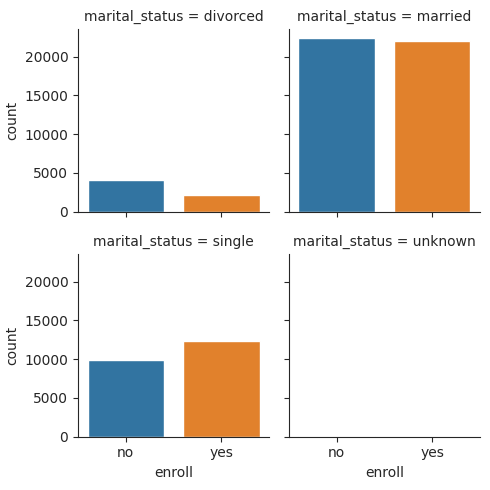

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'marital_status', 'enroll')

Singles are more likely to enroll than divorced

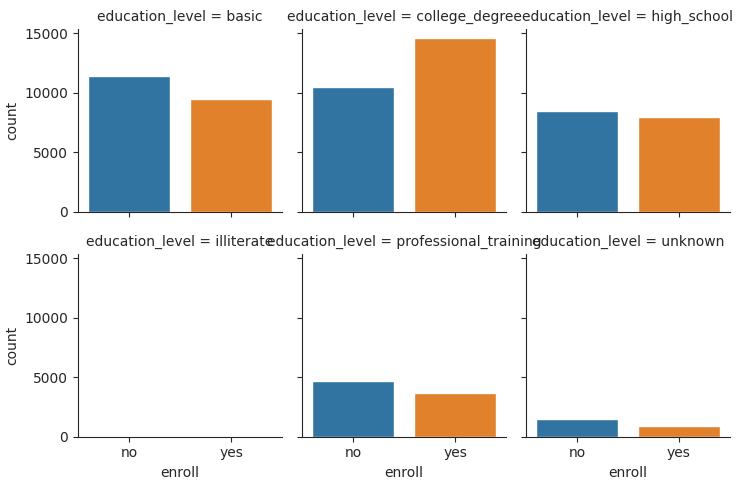

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'education_level', 'enroll')

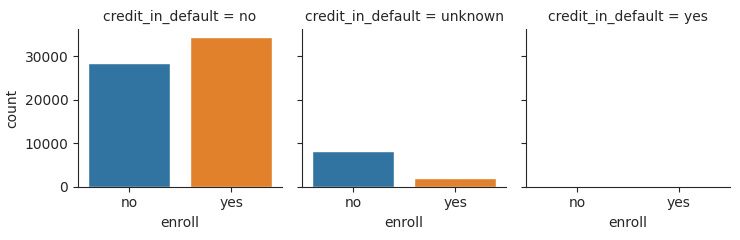

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'credit_in_default', 'enroll')

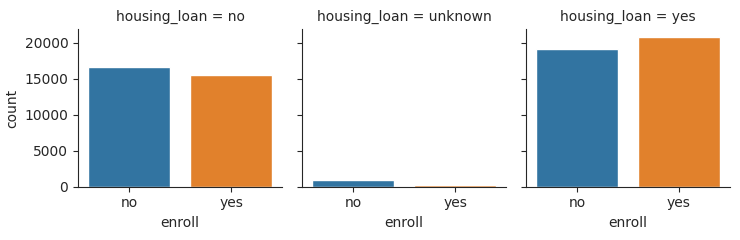

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'housing_loan', 'enroll')

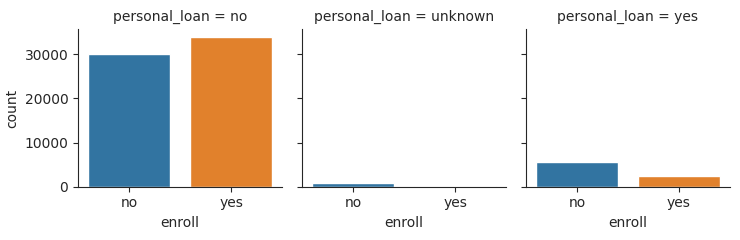

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'personal_loan', 'enroll')

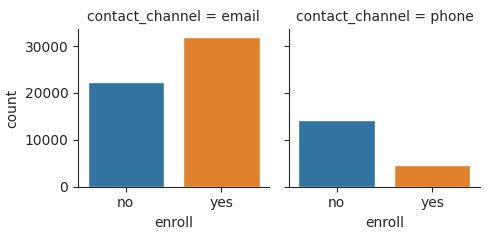

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'contact_channel', 'enroll')

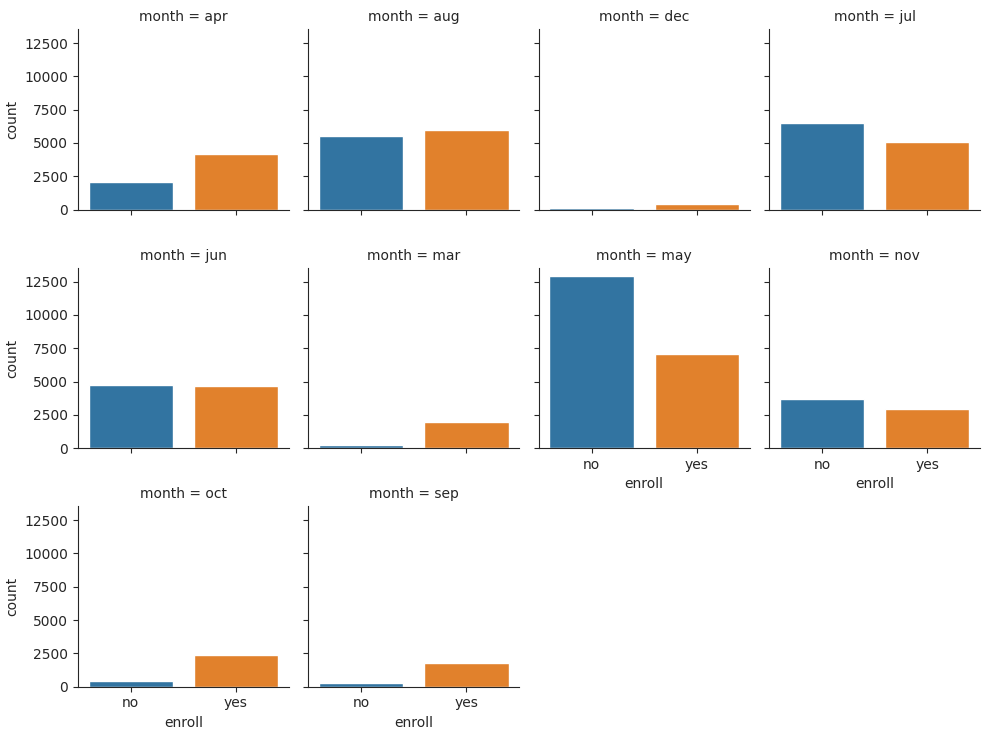

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'month', 'enroll')

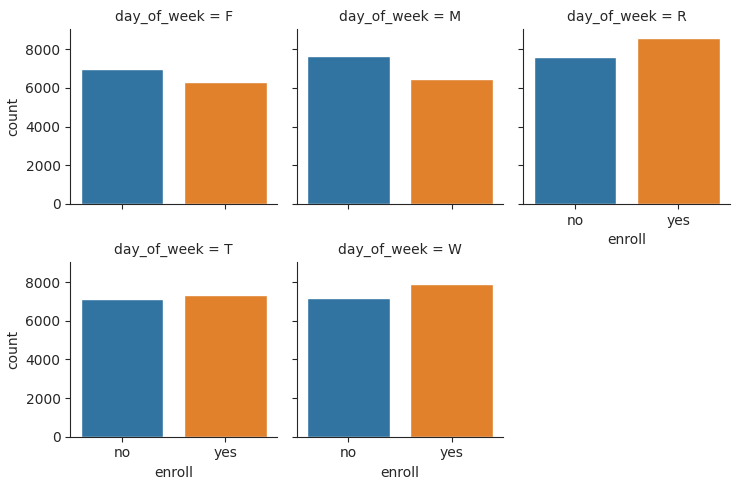

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'day_of_week', 'enroll')

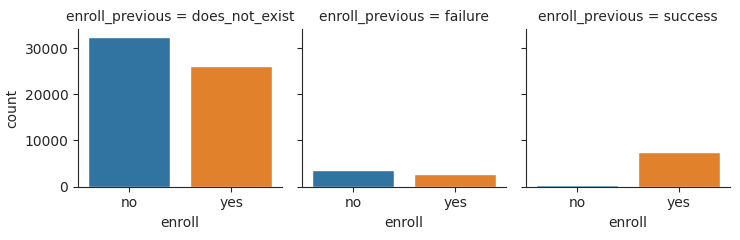

In [ ]:
from src.explore import explore_plot

explore_plot(data_upsampled, 'enroll_previous', 'enroll')

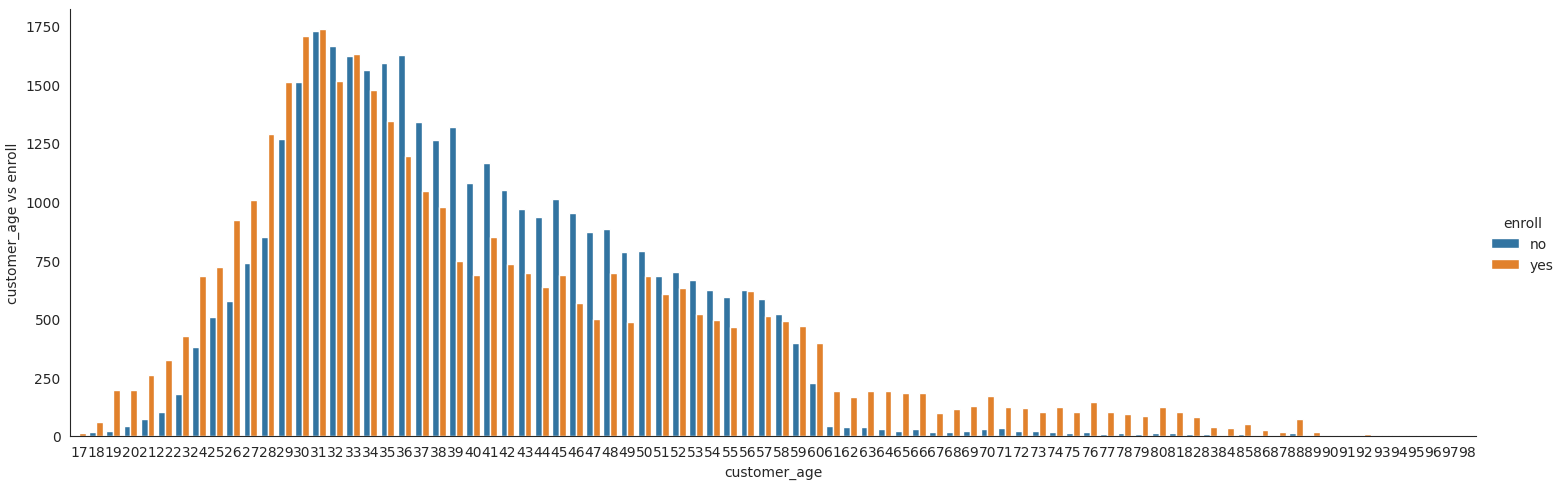

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="customer_age",
    target='enroll'
)

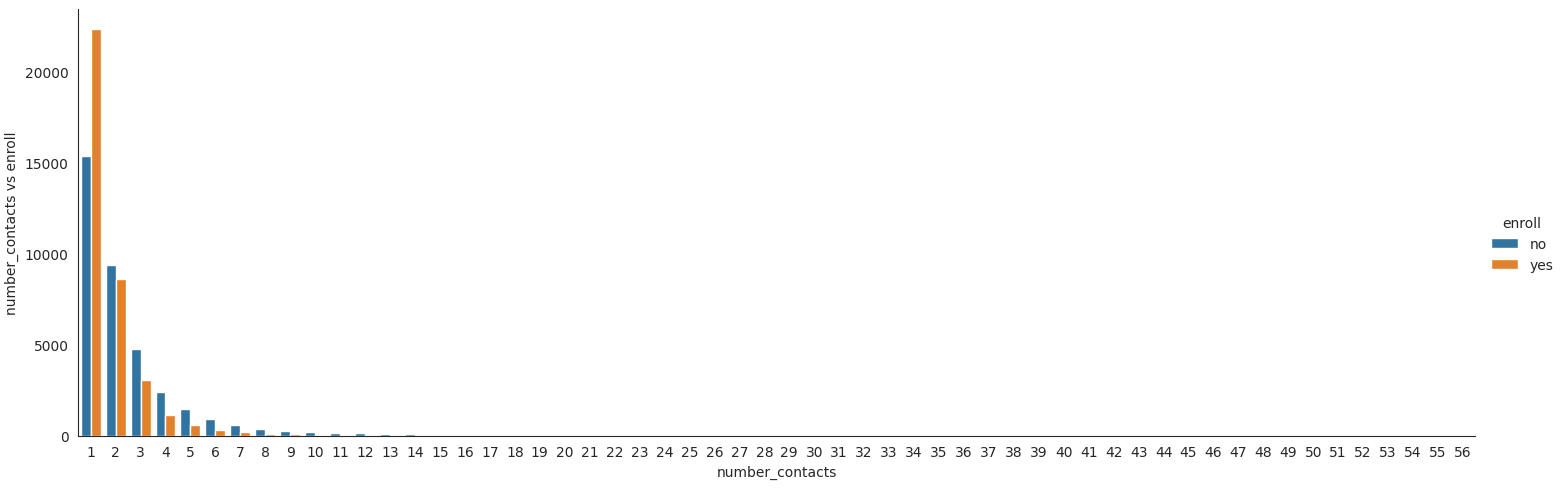

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="number_contacts",
    target='enroll'
)

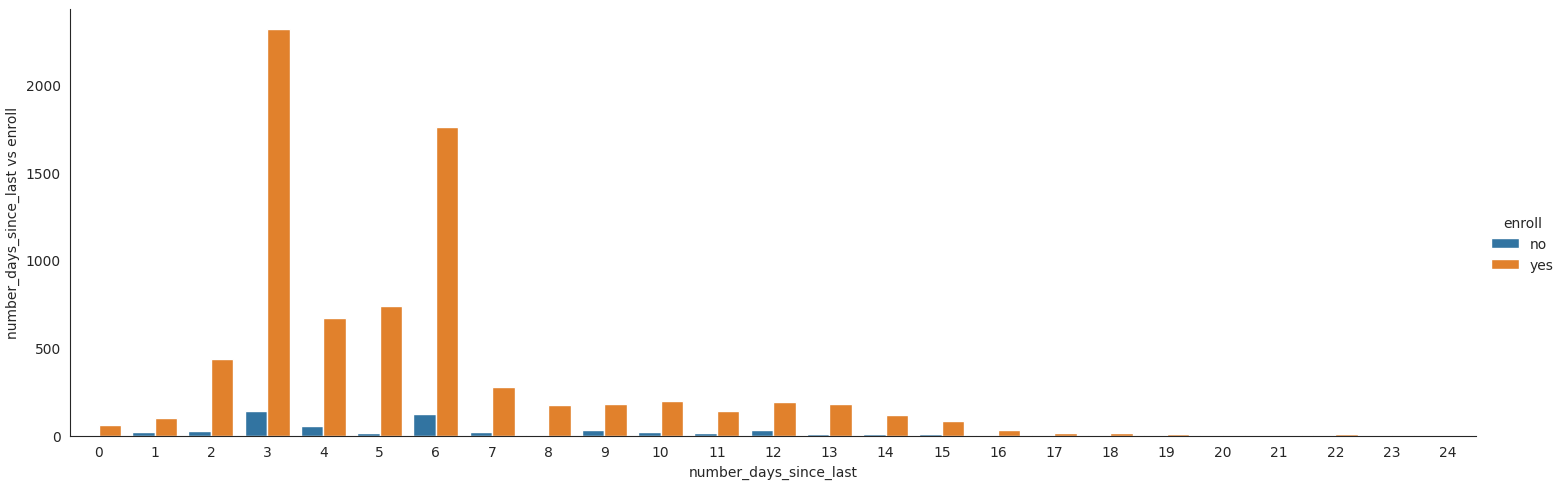

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="number_days_since_last",
    target='enroll',
    max_val=25
)

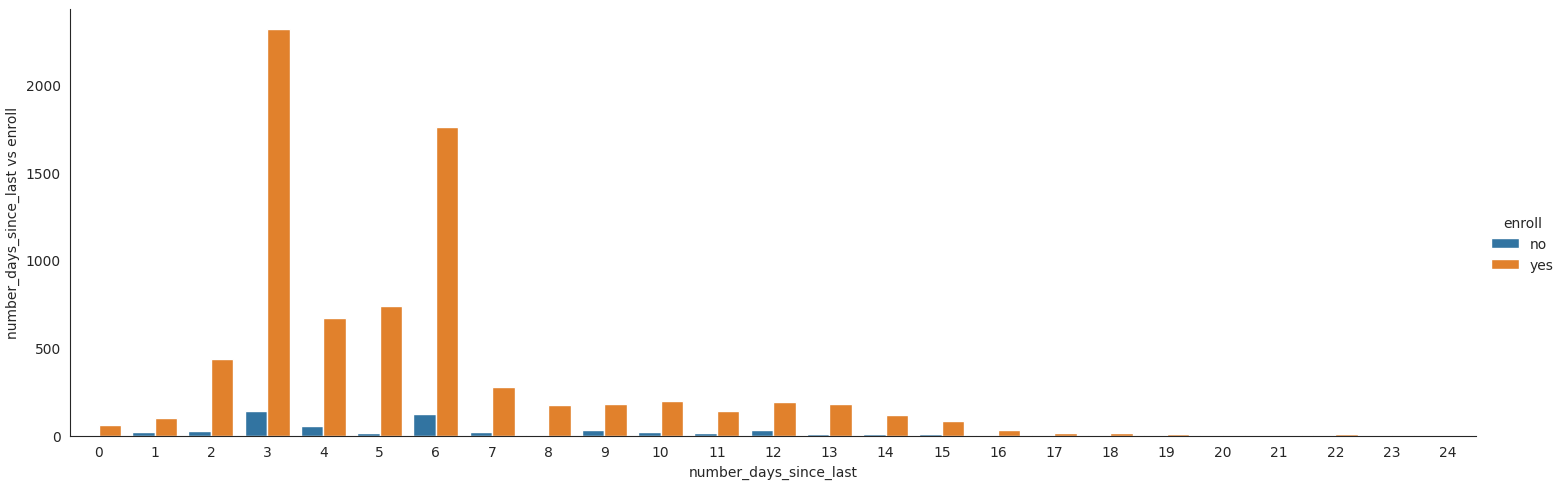

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="number_days_since_last",
    target='enroll',
    max_val=25
)

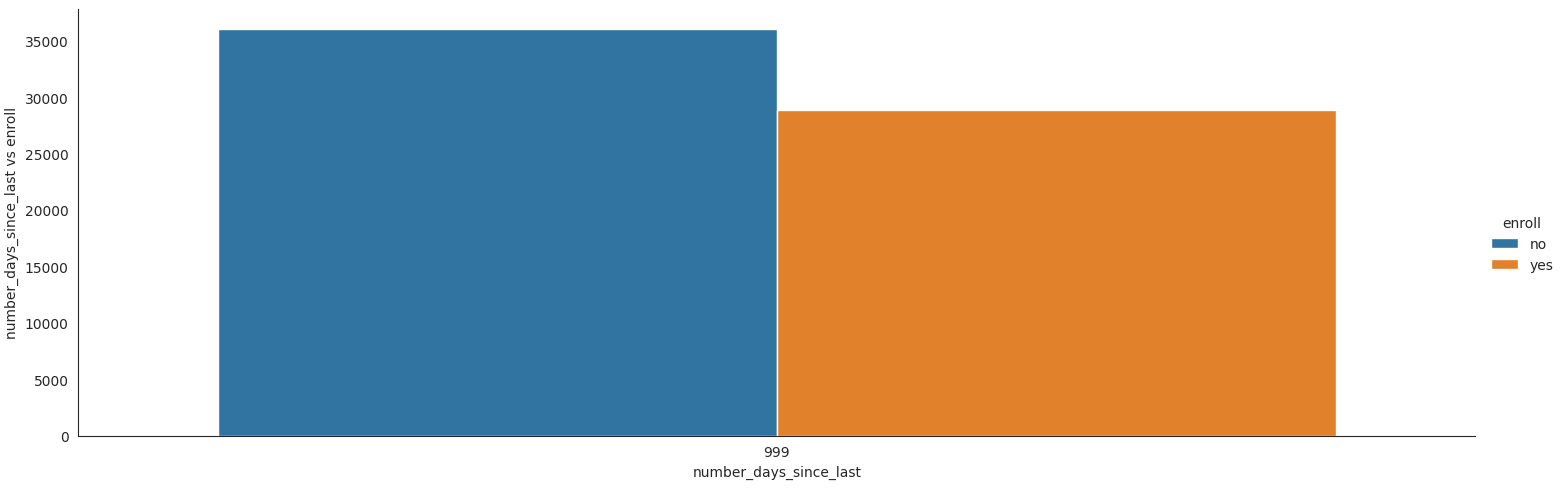

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="number_days_since_last",
    target='enroll',
    min_val=999
)

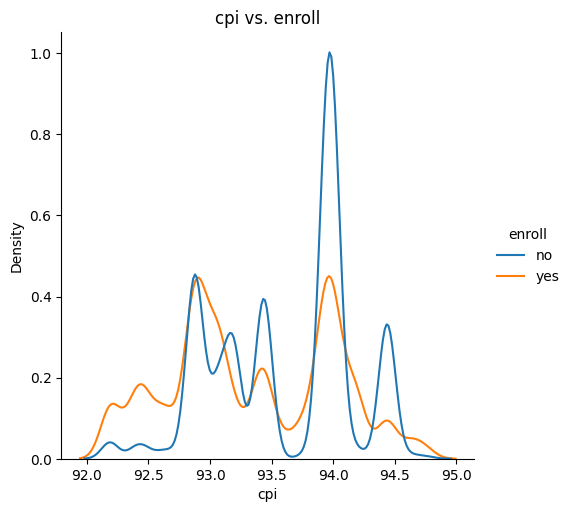

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="cpi",
    target='enroll'
)

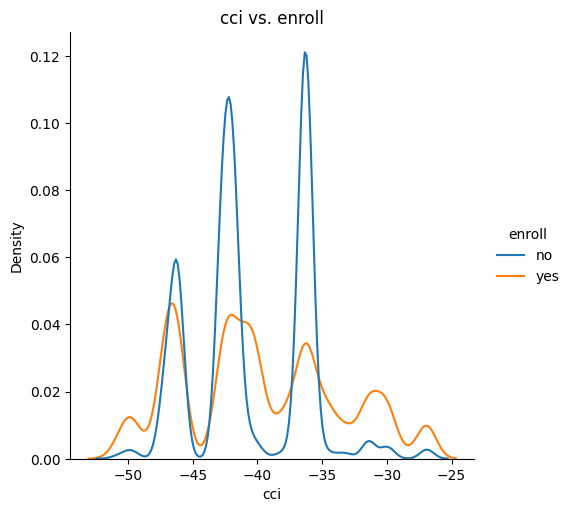

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols="cci",
    target='enroll'
)

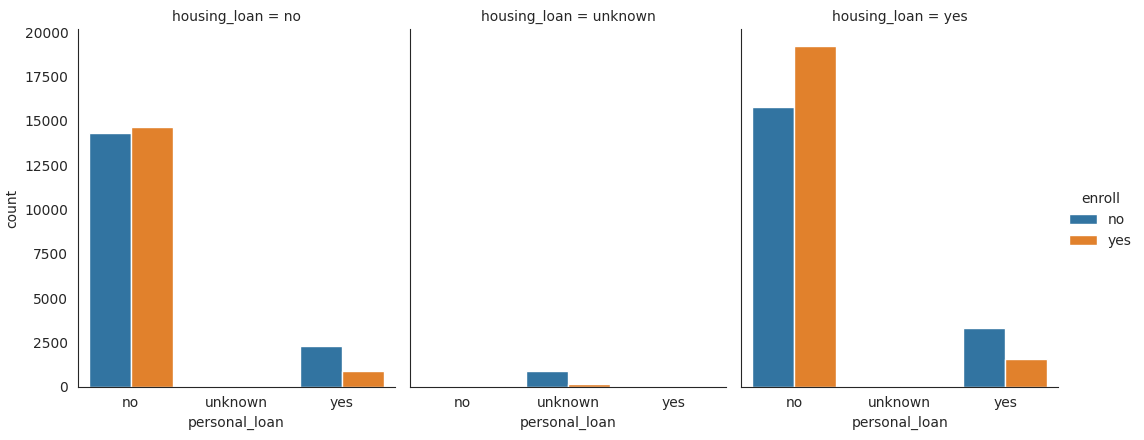

In [ ]:
# cat cat
import math
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_plot_columns(df: pd.DataFrame, column: str) -> int:
    n_unique = len(df[column].unique())
    if n_unique <= 3:
        return n_unique
    return math.ceil(math.sqrt(n_unique))

def explore_cat_cat_plot(
    df: pd.DataFrame,
    x: str,
    grouping: str,
    target: str,
    height: float | None,
    aspect: float | None
) -> None:
    with sns.axes_style('white'):    
        n = calculate_plot_columns(df, grouping)
        sns.catplot(
            x=x,
            hue=target,
            col=grouping,
            data=df,
            kind="count",
            col_wrap=n,
            height=height,
            aspect=aspect
        )

explore_cat_cat_plot(
    df=data_upsampled,
    x="personal_loan",
    grouping="housing_loan",
    target="enroll",
    height=4.5,
    aspect=0.8
)

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols=["personal_loan", "housing_loan"],
    target='enroll',
    height=4.5,
    aspect=0.8
)

TypeError: explore_multi_plot() got an unexpected keyword argument 'col'

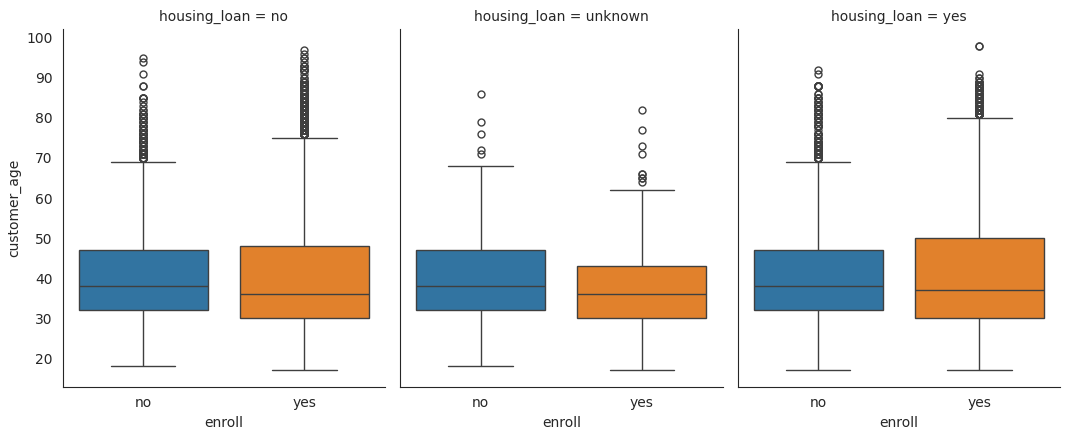

In [ ]:
# cat num
import seaborn as sns


def explore_cat_num_plot(
    df: pd.DataFrame,
    y: str,
    grouping: str,
    target: str,
    min_val: int | None,
    max_val: int | None,
    height: float | None,
    aspect: float | None
) -> None:
    plotting_data = df.copy()
    if min_val is not None:
        plotting_data = plotting_data[plotting_data[y] >= min_val]
    if max_val is not None:
        plotting_data = plotting_data[plotting_data[y] <= max_val]

    with sns.axes_style('white'):
        n = calculate_plot_columns(plotting_data, grouping)
        sns.catplot(
            x=target,
            y=y,
            col=grouping,
            hue=target,
            data=plotting_data,
            kind="box",
            height=height,
            aspect=aspect
        )

explore_cat_num_plot(
    df=data_upsampled,
    y="customer_age",
    grouping="housing_loan",
    target="enroll",
    min_val=None,
    max_val=None,
    height=4.5,
    aspect=0.8
)

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols=["customer_age", "housing_loan"],
    target='enroll',
    min_val=None,
    max_val=None,
    height=4.5,
    aspect=0.8
)

In [ ]:
# num num
import seaborn as sns
from typing import List

def explore_num_num_plot(
    df: pd.DataFrame,
    x: str,
    y: str,
    target: str,
    min_val: List[float | None] | None,
    max_val: List[float | None] | None
) -> None:
    plotting_data = df.copy()
    if min_val is not None:
        if not isinstance(min_val, list):
            raise TypeError("Min values needs to be a list")
        if len(min_val) != 2:
            raise IndexError("Min values requires 2 values")
        if min_val[0] is not None:
            plotting_data = plotting_data[plotting_data[x] >= min_val[0]]
        if min_val[1] is not None:
            plotting_data = plotting_data[plotting_data[y] >= min_val[1]]
    if max_val is not None:
        if not isinstance(max_val, list):
            raise TypeError("Max values needs to be a list")
        if len(max_val) != 2:
            raise IndexError("Max values requires 2 values")
        if max_val[0] is not None:
            plotting_data = plotting_data[plotting_data[x] <= max_val[0]]
        if max_val[1] is not None:
            plotting_data = plotting_data[plotting_data[y] <= max_val[1]]
    
    sns.scatterplot(
        data=plotting_data,
        x=x,
        y=y,
        hue=target,
        size=target
    )


explore_num_num_plot(
    df=data_upsampled,
    x="cpi",
    y="cci",
    target="enroll",
    min_val=None,
    max_val=None
)

TypeError: Min values needs to be a list

In [ ]:
from src.explore import explore_plot

explore_plot(
    df=data_upsampled,
    cols=["cpi", "cci"],
    target='enroll',
    min_val=None,
    max_val=None,
    height=4.5,
    aspect=0.8
)

TypeError: explore_multi_plot() got an unexpected keyword argument 'col'